In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

비음수 행렬 분해(Non-negative Matrix Factorization, NMF)  
비음수 행렬 분해는 데이터 행렬 내 보든 원소값이 0이상인 경우 사용할 수 있는 행렬 분해 방법이다.  

비음수 행렬 분해 알고리즘을 이용해 사람 얼굴의 특징 요소를 추출하는 모델을 생성해본다.  

In [7]:
# 비음수 행렬 분해에는 얼굴 이미지 데이터를 이용한다. 
# 비음수 행렬 분해에서 쓰이는 데이터는 성분이 모두 음수가 아닌 성분이어야 하므로 , 주로 이미지 데이터 혹은 음성 데이터와 
# 같이 음수값이 없는 데이터가 많이 사용된다.  
from sklearn import datasets  # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다. 
# fetch_lfw_people 데이터셋에서 min_faces_per_person 속성으로 최소 얼굴 개수, resize 속성으로 얼굴 사이즈 조정 정도, 
# color 속성으로 컬러 표시 여부를 설정해서 얼굴 데이터를 불러온다. 
raw_face = datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.5, color=False)

In [8]:
# 얼굴 이미지 데이터 살펴보기 
# raw_face.images: 얼굴 이미지 데이터를 사각형 행렬로 나타낸 데이터 , 2차원 
n_samples, h, w =  raw_face.images.shape
print('전체 얼굴 개수: {} , 세로 크기:{}, 가로 크기: {}'.format(n_samples, h , w))

# raw_face.data: 얼굴 이미지 데이터를 사각형 행렬로 나타낸 데이터, 1차원
X = raw_face.data # 얼굴 이미지 피쳐 데이터를 저장한다. 
n, p = X.shape
# n이 3023인 이유는 모든 얼굴 이미지 데이터 개수가 3023개이기 때문이고 p가 2914인 이유는 기존 62*47 행렬을 
# 일렬로 늘어 뜨리면 2914이기 때문이다. 
print('n: {}, p: {}'.format(n,p))

y = raw_face.target # 얼굴 이미지 타겟 데이터를 저장한다. 
target_names = raw_face.target_names # 얼굴 이미지 데이터 이름을 저장한다. 
k = target_names.shape[0]
print('클래스 개수: {}'.format(k)) # 얼굴 종류는 총 62개 이다. 

전체 얼굴 개수: 3023 , 세로 크기:62, 가로 크기: 47
n: 3023, p: 2914
클래스 개수: 62


In [9]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape,y_tn.shape, X_te.shape, y_te.shape)

(2267, 2914) (2267,) (756, 2914) (756,)


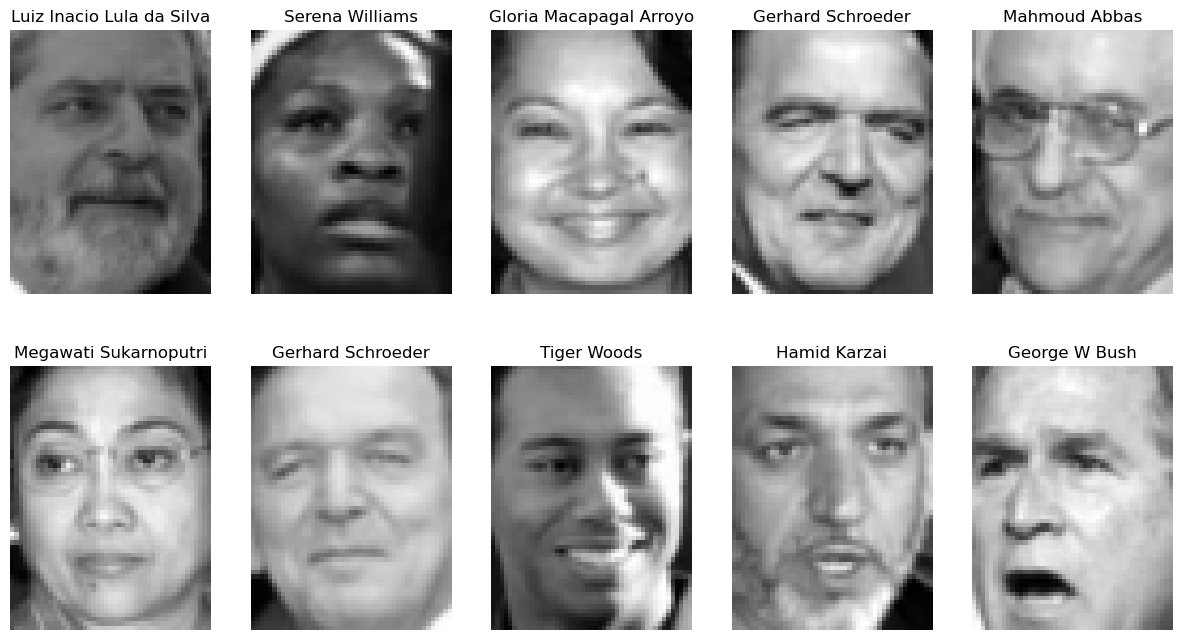

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 8])
plt.gray()
for i in range(10): 
    plt.subplot(2, 5, i+1)
    plt.imshow(X_tn[i].reshape((h,w)))
    plt.title(target_names[y_tn[i]])
    plt.axis('off')
plt.show()

In [18]:
# 비음수 행렬 분해를 통한 데이터 차원 축소
from sklearn.decomposition import NMF # 비음수 행렬 분해 알고리즘을 사용하기 위해 import 한다. 
# 2914 차원의 데이터를 10 차원으로 축소한다. 
nmf = NMF(n_components=100) # 비음수 행렬 분해 모델을 만든다. 
# NMF를 실행할 때 트레이닝 을 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 NMF 모델에 적합시킨 \
# 후 트레이닝 데이터의 차원을 축소한다. 
X_tn_nmf = nmf.fit_transform(X_tn)
X_te_nmf = nmf.transform(X_te) # 적합된 NMF 모델을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다. 

In [19]:
# NMF로 차원 축소된 벡터 확인 
print(nmf.components_)

[[0.         0.         0.10581163 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.9914251  0.12723055 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.43239644 ... 0.         0.         0.        ]
 [0.         0.         1.7605983  ... 0.         0.         0.        ]
 [0.         0.         6.2403884  ... 0.         0.12963235 0.        ]]


비음수 행렬 분해 후 차원이 축소된 데이터 시각화 

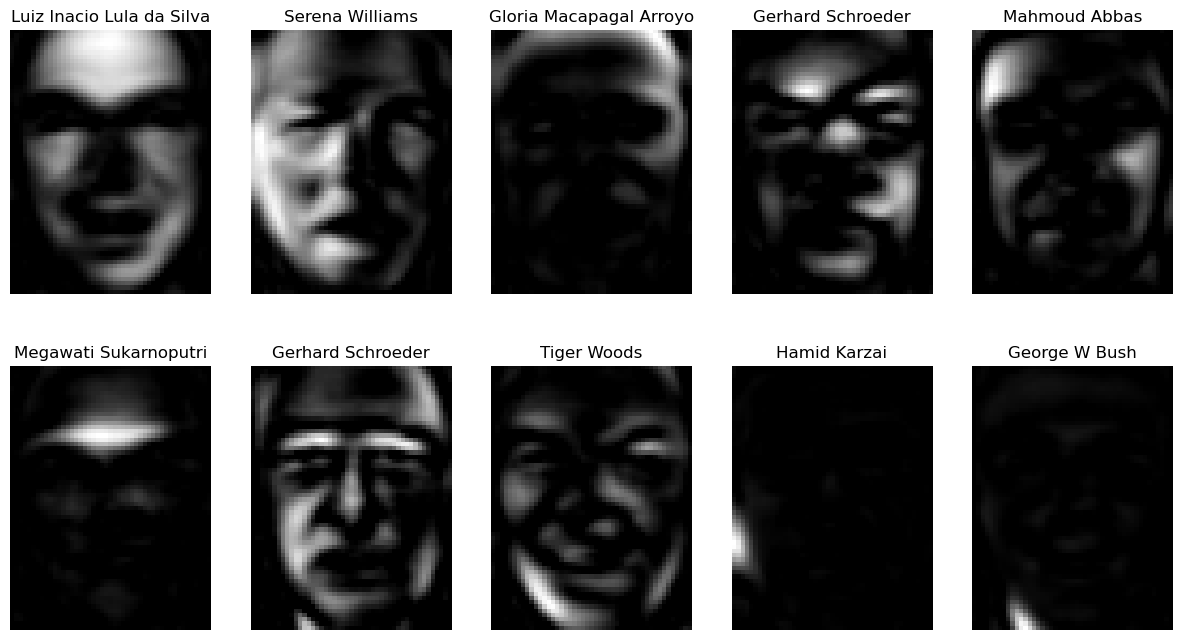

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 8])
plt.gray()
for i in range(10): 
    plt.subplot(2, 5, i+1)
    plt.imshow(nmf.components_[i].reshape((h,w)))
    plt.title(target_names[y_tn[i]])
    plt.axis('off')
plt.show()
